In [190]:
 %matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import mahotas as mh
from pylab import imshow, gray, show
from PIL import Image
import PIL.ImageOps
import imutils
import scipy.misc
import math
from skimage.measure import compare_ssim as ssim
from keras.models import load_model
from keras.preprocessing import image
import os 
import chess

In [191]:
#Load the color model
color = load_model('color_model.h5')

In [322]:
order_squares_white = ['a8','c8','e8','g8','b7','d7','f7','h7','a6','c6','e6',
                'g6','b5','d5','f5','h5','a4','c4','e4','g4','b3','d3',
                'f3','h3','a2','c2','e2','g2','b1','d1','f1','h1']

order_squares_green = ['b8','d8','f8','h8','a7','c7','e7','g7','b6','d6','f6',
                'h6','a5','c5','e5','g5','b4','d4','f4','h4','a3','c3',
                'e3','g3','b2','d2','f2','h2','a1','c1','e1','g1']

total_squares = ['a8','b8','c8','d8','e8','f8','g8','h8','a7','b7','c7','d7','e7','f7','g7','h7','a6','b6','c6','d6',
                 'e6','f6','g6','h6','a5','b5','c5','d5','e5','f5','g5','h5','a4','b4','c4','d4','e4','f4','g4','h4',
                 'a3','b3','c3','d3','e3','f3','g3','h3','a2','b2','c2','d2','e2','f2','g2','h2','a1','b1','c1',
                 'd1','e1','f1','g1','h1']

# king_boundaries = [
#     ([70, 130, 0],  [140, 220, 20]),
#     ([40, 90, 0],  [60, 120, 130]),
#     ([70, 130, 0],  [140, 220, 100])]

king_boundaries = [
    ([50, 170, 80],  [60, 180, 90]),
    ([80, 150, 80],  [90, 160, 95]),
    ([40, 150, 85],  [60, 160, 95]),
    ([110, 180, 120],  [120, 190, 130]),
    ([110, 150, 120],  [120, 160, 130]),
    ([90, 130, 90],  [100, 140, 100]),
    ([150, 210, 140],  [160, 220, 150]),
    ([90, 135, 90],  [110, 150, 110]),
    ([129, 165, 120],  [160, 175, 130])
]

bishop_boundaries = [
    ([220, 119, 0],  [255, 160, 80]),
    ([110, 70, 30],  [125, 80, 40]),
    ([120, 80, 50],  [130, 90, 60])
]

queen_boundaries = [
    ([150, 10, 20],  [190, 40, 60]),
    ([210, 30, 30],  [230, 50, 50]),
    ([170, 60, 60],  [190, 80, 80]),
    ([210, 90, 100],  [220, 100, 110]),
    ([80, 20, 20],  [90, 30, 30])
]

rook_boundaries = [
    ([50, 90, 140],  [90, 130, 180]),
    ([30, 60, 90],  [50, 80, 110]),
    ([80, 140, 200],  [100, 1500, 210])
]

black_boundaries = [
    ([0, 0, 0],  [50, 50, 50])
]

knight_boundaries = [
    ([240, 230, 60],  [255, 240, 80]),
    ([180, 160, 45],  [190, 170, 60]),
    ([120, 120, 20],  [150, 150, 50]),
    ([240, 240, 100],  [255, 250, 120]),
    ([210, 200, 120],  [220, 210, 130]),
    ([220, 180, 60],  [240, 210, 90])
]

pawn_boundaries = [
    ([120, 100, 60],  [150, 130, 110])
]



possible_pieces = [[king_boundaries, 'king'], [queen_boundaries, 'queen'], [bishop_boundaries, 'bishop'], [rook_boundaries, 'rook'], [knight_boundaries, 'knight'],
                  [pawn_boundaries, 'pawn']]
possible_color = [[black_boundaries, 'black']]
final_piece_mapping = {}

In [327]:
from skimage.measure import compare_ssim
from skimage.transform import resize
from scipy.misc import imsave
from scipy.ndimage import imread

def find_closest_letter(input_image3):
    test_image = image.load_img(input_image3, target_size=(84,84))

    
    imagee = cv2.imread(input_image3)
    imagee = cv2.cvtColor(imagee, cv2.COLOR_RGB2BGR)
    imshow(imagee)
    show()
    
    piece = None
    current_largest = 0
    colour = 'white'
    
    for boundry, name in possible_pieces:
        for (lower, upper) in boundry:
            imagee = cv2.imread(input_image3)
            imagee = cv2.cvtColor(imagee, cv2.COLOR_RGB2BGR)
            # create NumPy arrays from the boundaries
            lower = np.array(lower, dtype = "uint8")
            upper = np.array(upper, dtype = "uint8")

            # find the colors within the specified boundaries and apply
            # the mask
            mask = cv2.inRange(imagee, lower, upper)
            output = cv2.bitwise_and(imagee, imagee, mask = mask)
            ret,thresh1 = cv2.threshold(output,1,1,cv2.THRESH_BINARY)
#             imshow(output)
#             show()
            summation = thresh1.sum().sum()
            if(summation > 40 and summation > current_largest):
                print(lower)
                print(upper)
                piece = name
                current_largest = summation
                imshow(output)
                show()
    for boundry, name in possible_color:
        for (lower, upper) in boundry:
            imagee = cv2.imread(input_image3)
            imagee = cv2.cvtColor(imagee, cv2.COLOR_RGB2BGR)
            lower = np.array(lower, dtype = "uint8")
            upper = np.array(upper, dtype = "uint8")

            # find the colors within the specified boundaries and apply
            # the mask
            mask = cv2.inRange(imagee, lower, upper)
            output = cv2.bitwise_and(imagee, imagee, mask = mask)
            ret,thresh1 = cv2.threshold(output,1,1,cv2.THRESH_BINARY)
            summation = thresh1.sum().sum()
            if(summation > 400):
                colour = 'black'
                imshow(output)
                show()
    
    test_image = image.img_to_array(test_image)*(1./255)
    test_image = np.expand_dims(test_image, axis = 0)
    color_prediction = color.predict(test_image, batch_size = 32)
    if(np.argmax(color_prediction) == 1 and not piece):
        return "BLANK"
    else:
        if(not piece):
            return "BLANK"
        else:
            if(colour == 'black'):
                return ['black', piece]
            else:
                return ['white', piece]
            

In [328]:
def breakdown_image(image):
    im = Image.open(image)
    im = im.resize((700,700))

    def crop(im):
        imgwidth, imgheight = im.size
        imgwidth, imgheight = int(imgwidth), int(imgheight)
        height, width = imgheight/8, imgwidth/8
        count = 0
        print(np.linspace(0,imgheight,9))
        print("IMGWIDTH: {}\t IMGHEIGHT: {}\t WIDTH: {}\tHEIGHT: {}".format(imgwidth, imgheight, width, height))
        for i in np.linspace(0,imgheight,9):
            if(i == 700):
                break
            for j in np.linspace(0,imgwidth,9):
                if(j == 700):
                    break
                print("{}\t{}\t{}\t{}".format(j, i, j+width, i+height))
                box = (j, i, j+width, i+height)
                pass_in = np.array(im.crop(box))
                cv2.imwrite('intermediate.png', cv2.cvtColor(pass_in, cv2.COLOR_RGB2BGR))
                result = find_closest_letter('intermediate.png')
                if(result == 'BLANK'):
                    print("LOCATION: {} PIECE: {}".format(total_squares[count],'Blank'))
                elif(result[0] == 'black'):
                    print("LOCATION: {} PIECE: {}".format(total_squares[count], 'black '+result[1]))
                    piece = result[1]
                    if(piece == 'pawn'):
                        final_piece_mapping[count] = chess.Piece(chess.PAWN,chess.BLACK)
                    elif(piece == 'bishop'):
                        final_piece_mapping[count] = chess.Piece(chess.BISHOP,chess.BLACK)
                    elif(piece == 'queen'):
                        final_piece_mapping[count] = chess.Piece(chess.QUEEN,chess.BLACK)
                    elif(piece == 'king'):
                        final_piece_mapping[count] = chess.Piece(chess.KING,chess.BLACK)
                    elif(piece == 'knight'):
                        final_piece_mapping[count] = chess.Piece(chess.KNIGHT,chess.BLACK)
                    elif(piece == 'rook'):
                        final_piece_mapping[count] = chess.Piece(chess.ROOK,chess.BLACK)
                elif(result[0] == 'white'):
                    print("LOCATION: {} PIECE: {}".format(total_squares[count], 'white '+result[1]))
                    piece = result[1]
                    if(piece == 'pawn'):
                        final_piece_mapping[count] = chess.Piece(chess.PAWN,chess.WHITE)
                    elif(piece == 'bishop'):
                        final_piece_mapping[count] = chess.Piece(chess.BISHOP,chess.WHITE)
                    elif(piece == 'queen'):
                        final_piece_mapping[count] = chess.Piece(chess.QUEEN,chess.WHITE)
                    elif(piece == 'king'):
                        final_piece_mapping[count] = chess.Piece(chess.KING,chess.WHITE)
                    elif(piece == 'knight'):
                        final_piece_mapping[count] = chess.Piece(chess.KNIGHT,chess.WHITE)
                    elif(piece == 'rook'):
                        final_piece_mapping[count] = chess.Piece(chess.ROOK,chess.WHITE)
                count += 1
    crop(im)

[  0.   87.5 175.  262.5 350.  437.5 525.  612.5 700. ]
IMGWIDTH: 700	 IMGHEIGHT: 700	 WIDTH: 87.5	HEIGHT: 87.5
0.0	0.0	87.5	87.5


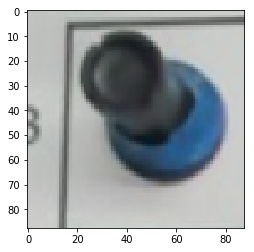

[ 50  90 140]
[ 90 130 180]


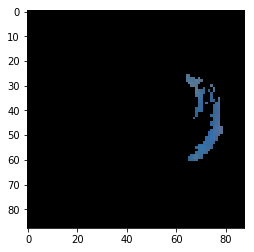

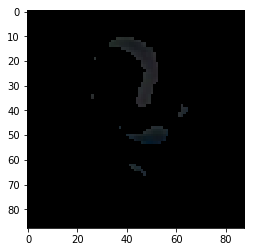

LOCATION: a8 PIECE: black rook
87.5	0.0	175.0	87.5


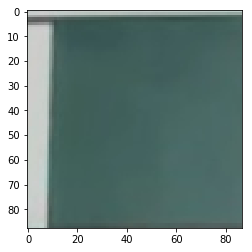

LOCATION: b8 PIECE: Blank
175.0	0.0	262.5	87.5


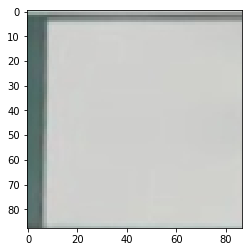

LOCATION: c8 PIECE: Blank
262.5	0.0	350.0	87.5


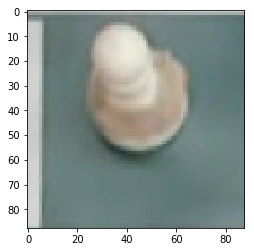

[120 100  60]
[150 130 110]


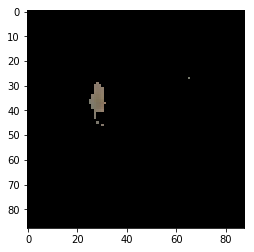

LOCATION: d8 PIECE: white pawn
350.0	0.0	437.5	87.5


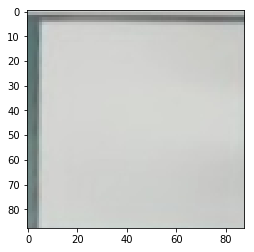

LOCATION: e8 PIECE: Blank
437.5	0.0	525.0	87.5


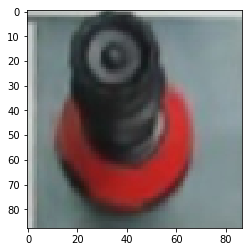

[150  10  20]
[190  40  60]


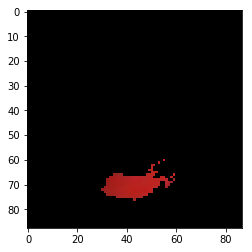

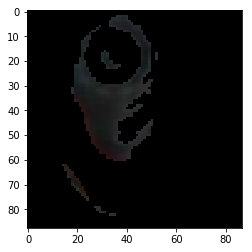

LOCATION: f8 PIECE: black queen
525.0	0.0	612.5	87.5


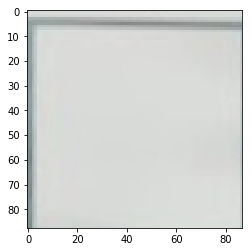

LOCATION: g8 PIECE: Blank
612.5	0.0	700.0	87.5


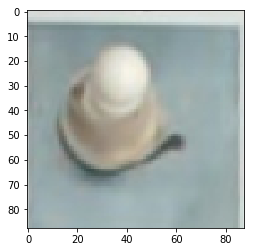

[120 100  60]
[150 130 110]


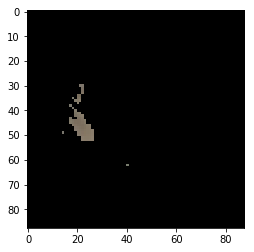

LOCATION: h8 PIECE: white pawn
0.0	87.5	87.5	175.0


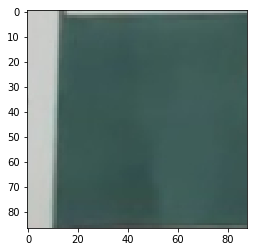

LOCATION: a7 PIECE: Blank
87.5	87.5	175.0	175.0


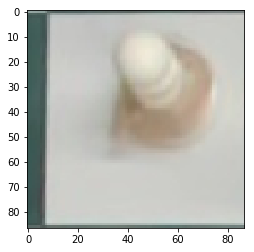

[120 100  60]
[150 130 110]


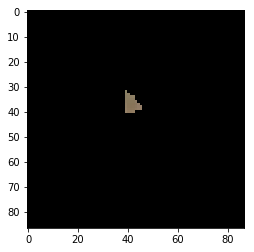

LOCATION: b7 PIECE: white pawn
175.0	87.5	262.5	175.0


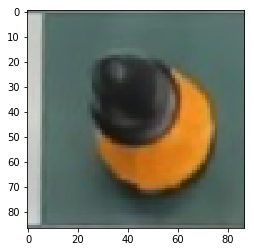

[220 119   0]
[255 160  80]


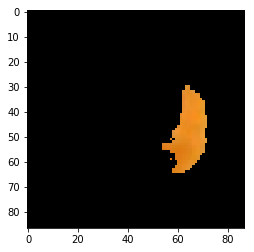

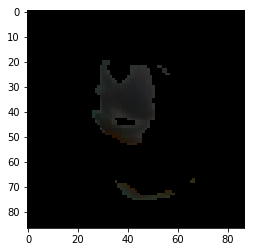

LOCATION: c7 PIECE: black bishop
262.5	87.5	350.0	175.0


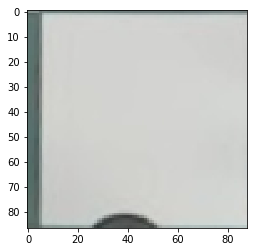

LOCATION: d7 PIECE: Blank
350.0	87.5	437.5	175.0


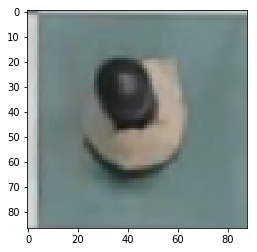

[120 100  60]
[150 130 110]


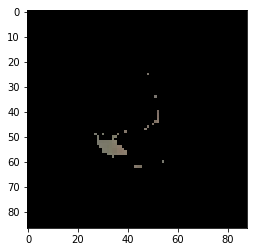

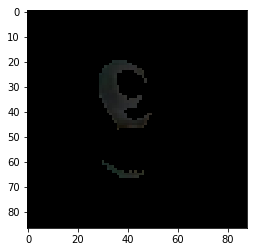

LOCATION: e7 PIECE: black pawn
437.5	87.5	525.0	175.0


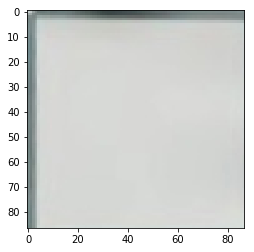

LOCATION: f7 PIECE: Blank
525.0	87.5	612.5	175.0


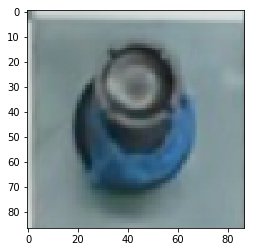

[ 50  90 140]
[ 90 130 180]


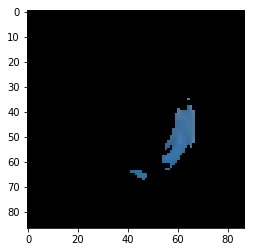

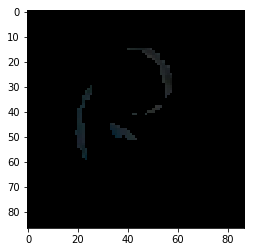

LOCATION: g7 PIECE: black rook
612.5	87.5	700.0	175.0


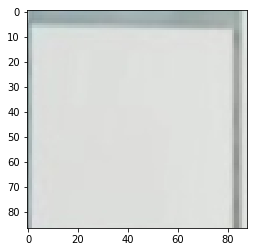

LOCATION: h7 PIECE: Blank
0.0	175.0	87.5	262.5


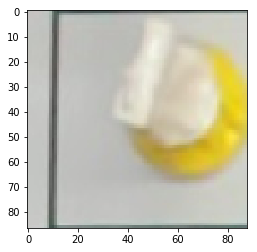

[220 180  60]
[240 210  90]


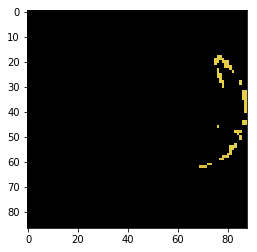

LOCATION: a6 PIECE: white knight
87.5	175.0	175.0	262.5


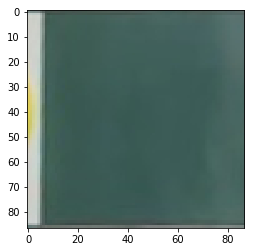

LOCATION: b6 PIECE: Blank
175.0	175.0	262.5	262.5


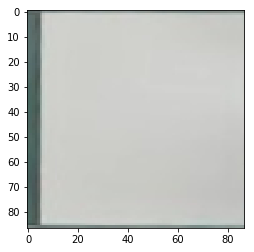

LOCATION: c6 PIECE: Blank
262.5	175.0	350.0	262.5


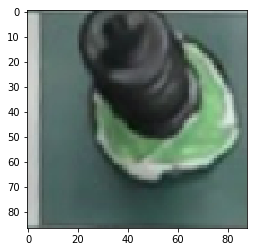

[ 90 130  90]
[100 140 100]


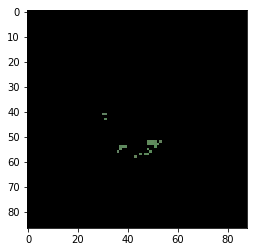

[ 90 135  90]
[110 150 110]


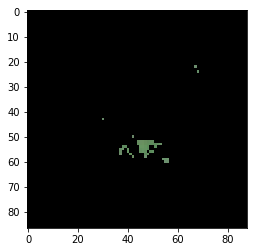

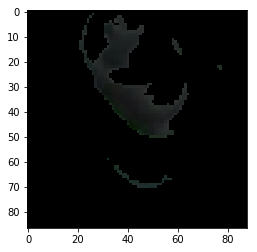

LOCATION: d6 PIECE: black king
350.0	175.0	437.5	262.5


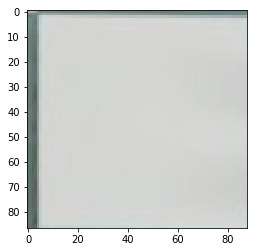

LOCATION: e6 PIECE: Blank
437.5	175.0	525.0	262.5


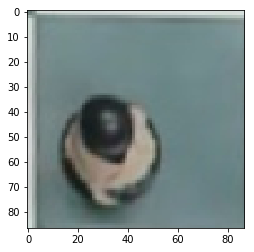

[120 100  60]
[150 130 110]


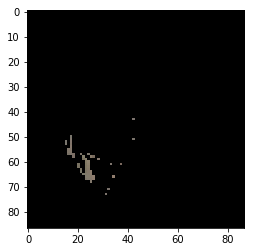

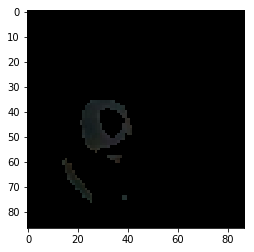

LOCATION: f6 PIECE: black pawn
525.0	175.0	612.5	262.5


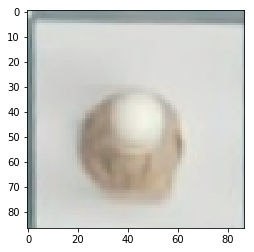

[120 100  60]
[150 130 110]


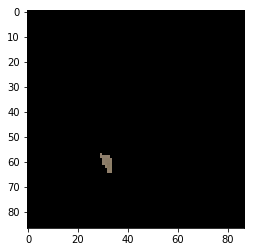

LOCATION: g6 PIECE: white pawn
612.5	175.0	700.0	262.5


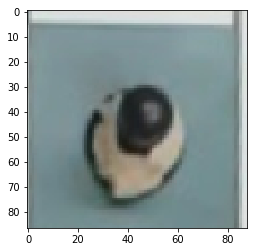

[120 100  60]
[150 130 110]


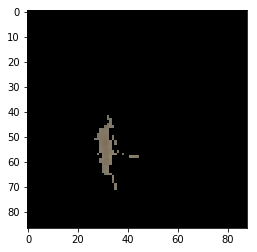

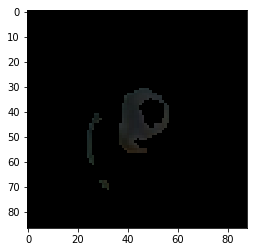

LOCATION: h6 PIECE: black pawn
0.0	262.5	87.5	350.0


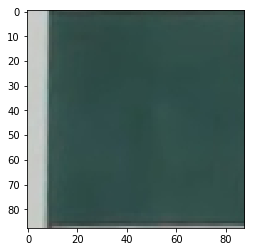

LOCATION: a5 PIECE: Blank
87.5	262.5	175.0	350.0


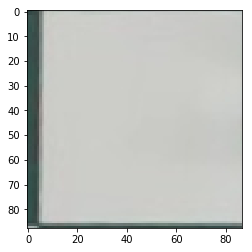

LOCATION: b5 PIECE: Blank
175.0	262.5	262.5	350.0


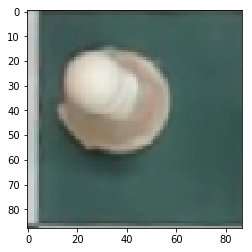

[120 100  60]
[150 130 110]


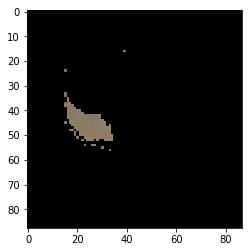

LOCATION: c5 PIECE: white pawn
262.5	262.5	350.0	350.0


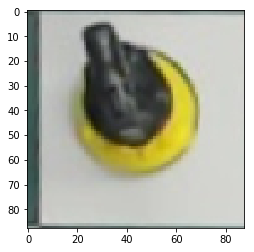

[120 120  20]
[150 150  50]


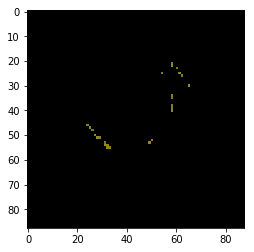

[220 180  60]
[240 210  90]


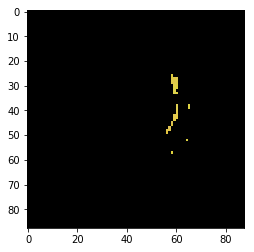

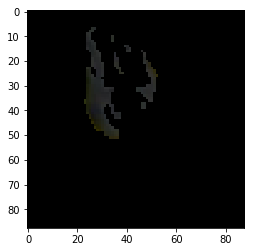

LOCATION: d5 PIECE: black knight
350.0	262.5	437.5	350.0


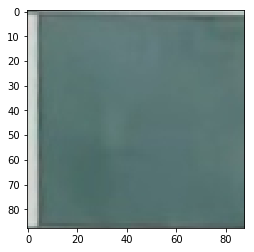

LOCATION: e5 PIECE: Blank
437.5	262.5	525.0	350.0


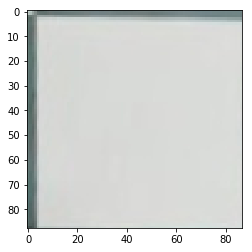

LOCATION: f5 PIECE: Blank
525.0	262.5	612.5	350.0


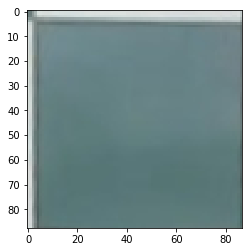

LOCATION: g5 PIECE: Blank
612.5	262.5	700.0	350.0


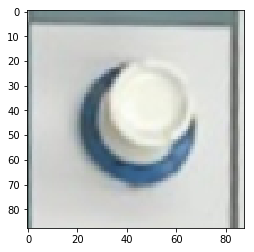

[ 50  90 140]
[ 90 130 180]


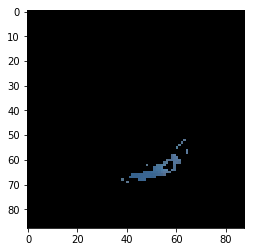

LOCATION: h5 PIECE: white rook
0.0	350.0	87.5	437.5


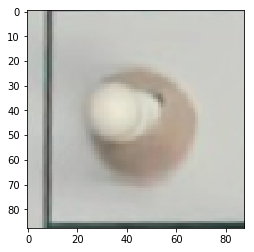

[120 100  60]
[150 130 110]


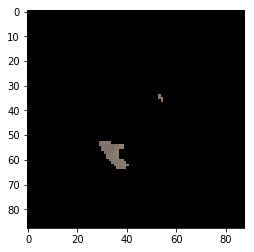

LOCATION: a4 PIECE: white pawn
87.5	350.0	175.0	437.5


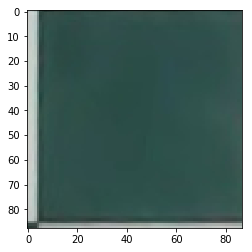

LOCATION: b4 PIECE: Blank
175.0	350.0	262.5	437.5


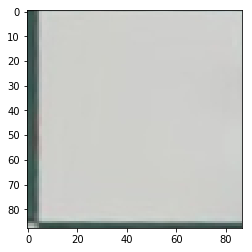

LOCATION: c4 PIECE: Blank
262.5	350.0	350.0	437.5


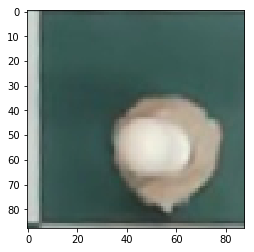

[120 100  60]
[150 130 110]


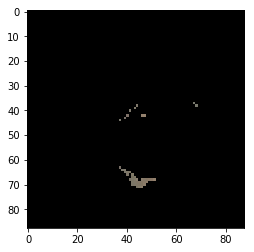

LOCATION: d4 PIECE: white pawn
350.0	350.0	437.5	437.5


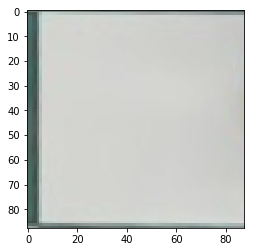

LOCATION: e4 PIECE: Blank
437.5	350.0	525.0	437.5


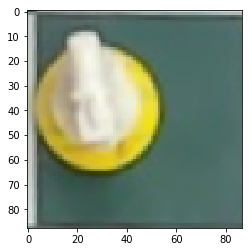

[180 160  45]
[190 170  60]


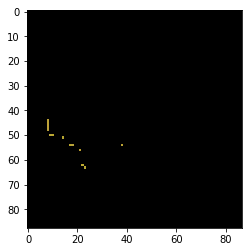

[120 120  20]
[150 150  50]


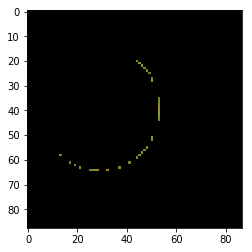

LOCATION: f4 PIECE: white knight
525.0	350.0	612.5	437.5


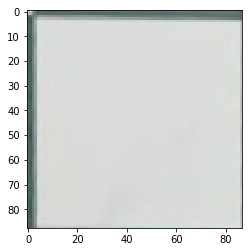

LOCATION: g4 PIECE: Blank
612.5	350.0	700.0	437.5


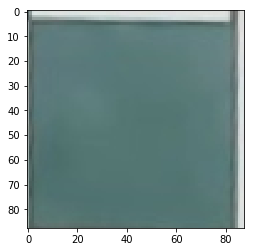

LOCATION: h4 PIECE: Blank
0.0	437.5	87.5	525.0


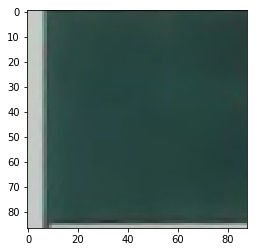

LOCATION: a3 PIECE: Blank
87.5	437.5	175.0	525.0


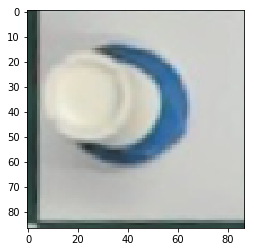

[ 50  90 140]
[ 90 130 180]


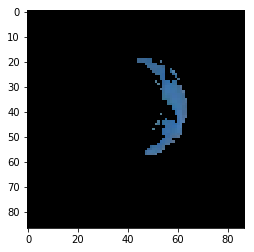

LOCATION: b3 PIECE: white rook
175.0	437.5	262.5	525.0


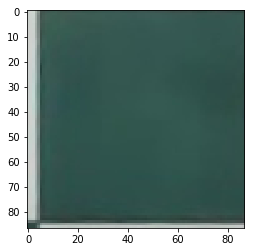

LOCATION: c3 PIECE: Blank
262.5	437.5	350.0	525.0


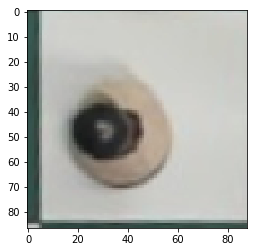

[120 100  60]
[150 130 110]


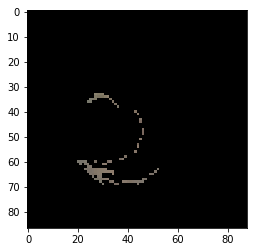

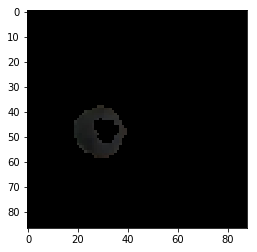

LOCATION: d3 PIECE: black pawn
350.0	437.5	437.5	525.0


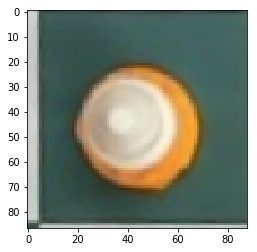

[220 119   0]
[255 160  80]


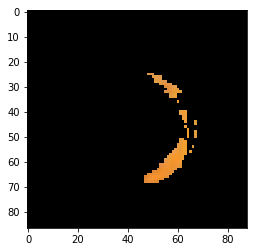

LOCATION: e3 PIECE: white bishop
437.5	437.5	525.0	525.0


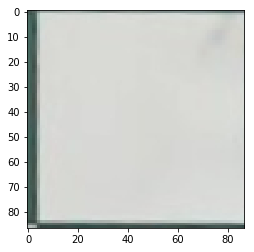

LOCATION: f3 PIECE: Blank
525.0	437.5	612.5	525.0


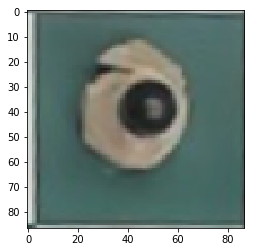

[120 100  60]
[150 130 110]


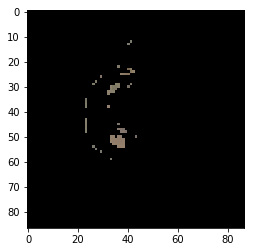

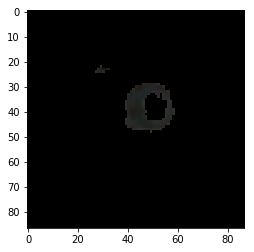

LOCATION: g3 PIECE: black pawn
612.5	437.5	700.0	525.0


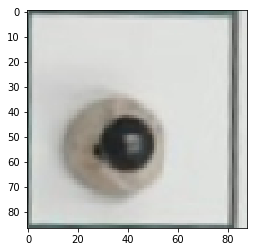

[120 100  60]
[150 130 110]


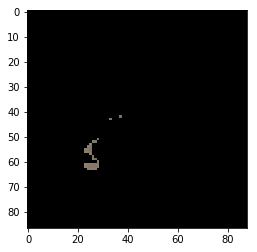

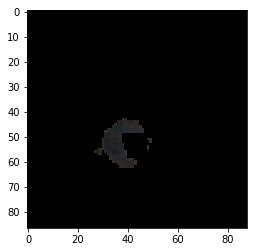

LOCATION: h3 PIECE: black pawn
0.0	525.0	87.5	612.5


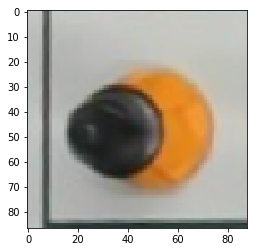

[220 119   0]
[255 160  80]


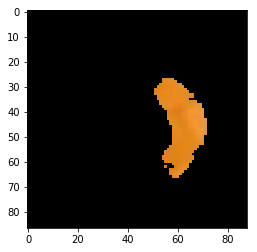

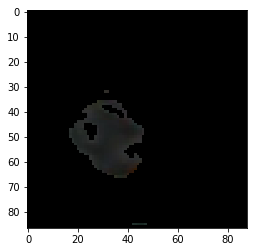

LOCATION: a2 PIECE: black bishop
87.5	525.0	175.0	612.5


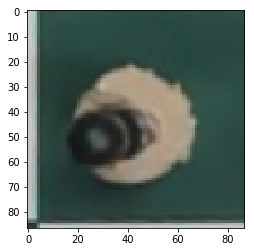

[120 100  60]
[150 130 110]


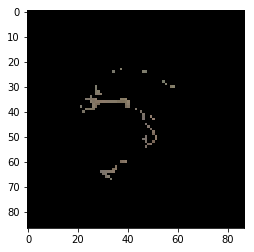

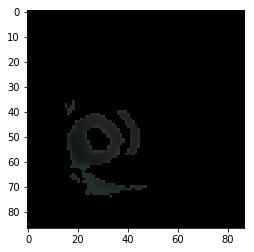

LOCATION: b2 PIECE: black pawn
175.0	525.0	262.5	612.5


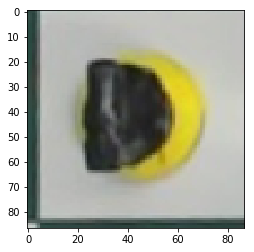

[220 180  60]
[240 210  90]


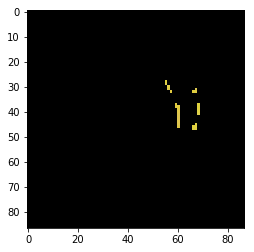

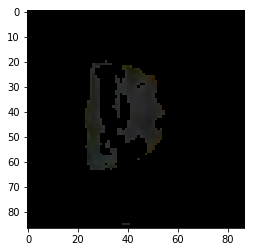

LOCATION: c2 PIECE: black knight
262.5	525.0	350.0	612.5


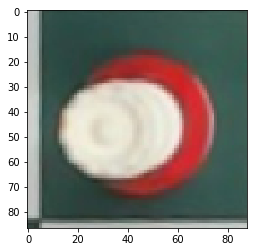

[150  10  20]
[190  40  60]


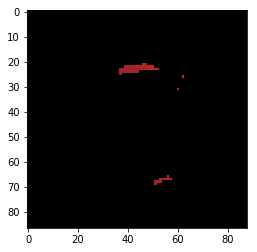

[210  30  30]
[230  50  50]


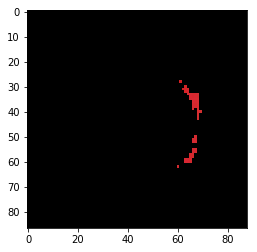

LOCATION: d2 PIECE: white queen
350.0	525.0	437.5	612.5


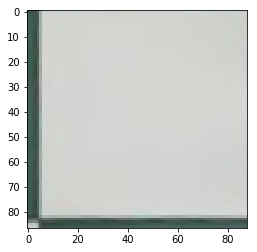

LOCATION: e2 PIECE: Blank
437.5	525.0	525.0	612.5


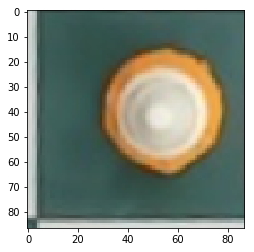

[220 119   0]
[255 160  80]


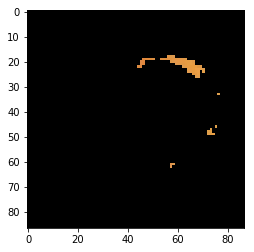

LOCATION: f2 PIECE: white bishop
525.0	525.0	612.5	612.5


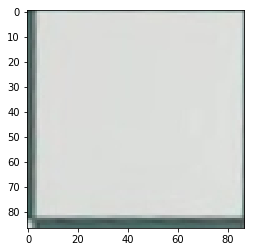

LOCATION: g2 PIECE: Blank
612.5	525.0	700.0	612.5


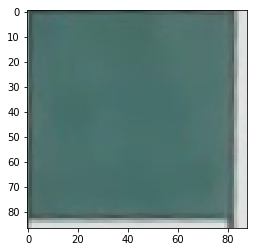

LOCATION: h2 PIECE: Blank
0.0	612.5	87.5	700.0


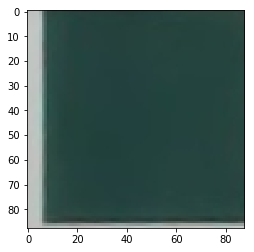

LOCATION: a1 PIECE: Blank
87.5	612.5	175.0	700.0


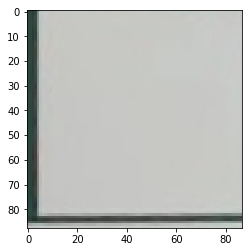

LOCATION: b1 PIECE: Blank
175.0	612.5	262.5	700.0


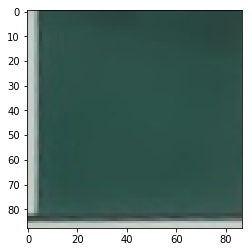

LOCATION: c1 PIECE: Blank
262.5	612.5	350.0	700.0


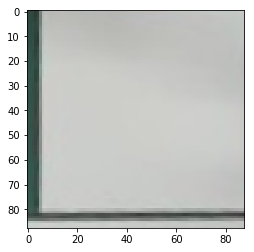

LOCATION: d1 PIECE: Blank
350.0	612.5	437.5	700.0


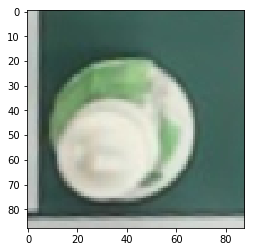

[ 90 135  90]
[110 150 110]


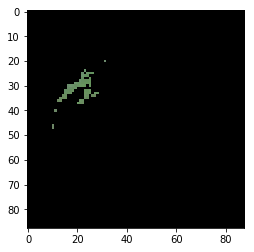

LOCATION: e1 PIECE: white king
437.5	612.5	525.0	700.0


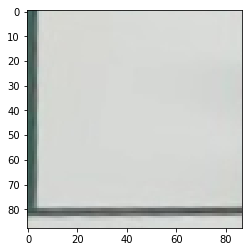

LOCATION: f1 PIECE: Blank
525.0	612.5	612.5	700.0


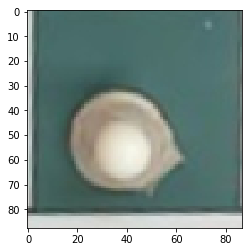

[120 100  60]
[150 130 110]


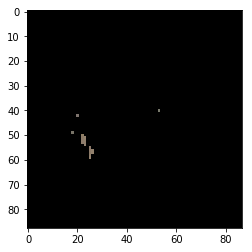

LOCATION: g1 PIECE: white pawn
612.5	612.5	700.0	700.0


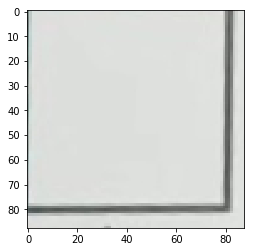

LOCATION: h1 PIECE: Blank


In [329]:
def identify_pieces_on_board(image):
    #answer, number = find_optimal_threshold(image)
    #Part below doesn't run?
    #%run python main.py --input image --output board.jpg detect
    #subprocess.check_output(["python", "main.py", "--input",image,"--output","board.jpg","detect"])
    breakdown_image('board.jpg')

identify_pieces_on_board('test.jpg')

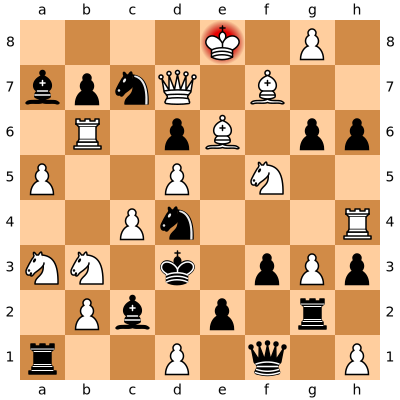

In [331]:
import chess
board = chess.Board()
board.set_piece_map(final_piece_mapping)
#board.set_piece_at(10, chess.Piece('queen',1), promoted=False)
board

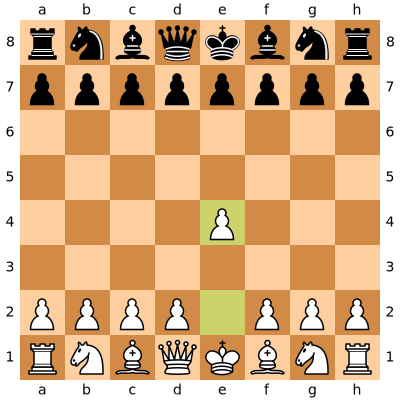

In [181]:
Nf3 = chess.Move.from_uci("e2e4")
board.push(Nf3)
board

In [189]:
chess.Piece('knight','white')
board.set_piece_map(final_piece_mapping)

AttributeError: 'str' object has no attribute 'piece_type'